In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports'
list_links = []
#Links for the days in January
for c in range(22, 32):
    list_links.append(str(base_url+f'/01-{c}-2020.csv'))
#Links for the days in February
for c in range(1, 30):
    if c <= 9:
        list_links.append(str(base_url+f'/02-0{c}-2020.csv'))
    else:
        list_links.append(str(base_url+f'/02-{c}-2020.csv'))
#Links for the days in March
for c in range(1, 5):
    if c <= 9:
        list_links.append(str(base_url+f'/03-0{c}-2020.csv'))
    else:
        list_links.append(str(base_url+f'/03-{c}-2020.csv'))

**Appending the Values in the links to a Dataframe**

In [3]:
list = []
for filename in list_links:
    df = pd.read_csv(filename, index_col=None, header=0)
    list.append(df)

data = pd.concat(list, axis=0, ignore_index=True)

In [4]:
data

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3390,NaN,Ukraine,2020-03-03T15:33:02,1.0,0.0,0.0,48.3794,31.1656
3391,From Diamond Princess,Australia,2020-02-29T02:03:10,0.0,0.0,0.0,35.4437,139.6380
3392,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0,29.3829,-98.6134
3393,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0,41.2545,-95.9758


In [5]:
data["Last Update"] = pd.to_datetime(data['Last Update'])
data["Date"] = pd.DatetimeIndex(data["Last Update"]).date

Time Series Lists 

In [6]:
list_dead = []
list_confirm_cases = []
list_recovered = []

for i in range(0,len(list)):
    list_dead.append((list[i]['Deaths']).sum())
    list_confirm_cases.append((list[i]['Confirmed']).sum())
    list_recovered.append((list[i]['Recovered']).sum())

Extract latest Date to use in the plot

In [7]:
a = data[["Confirmed","Deaths","Recovered","Date"]].groupby('Date').sum()
b = a.index[-1]

Plot Total Cases Worldwide

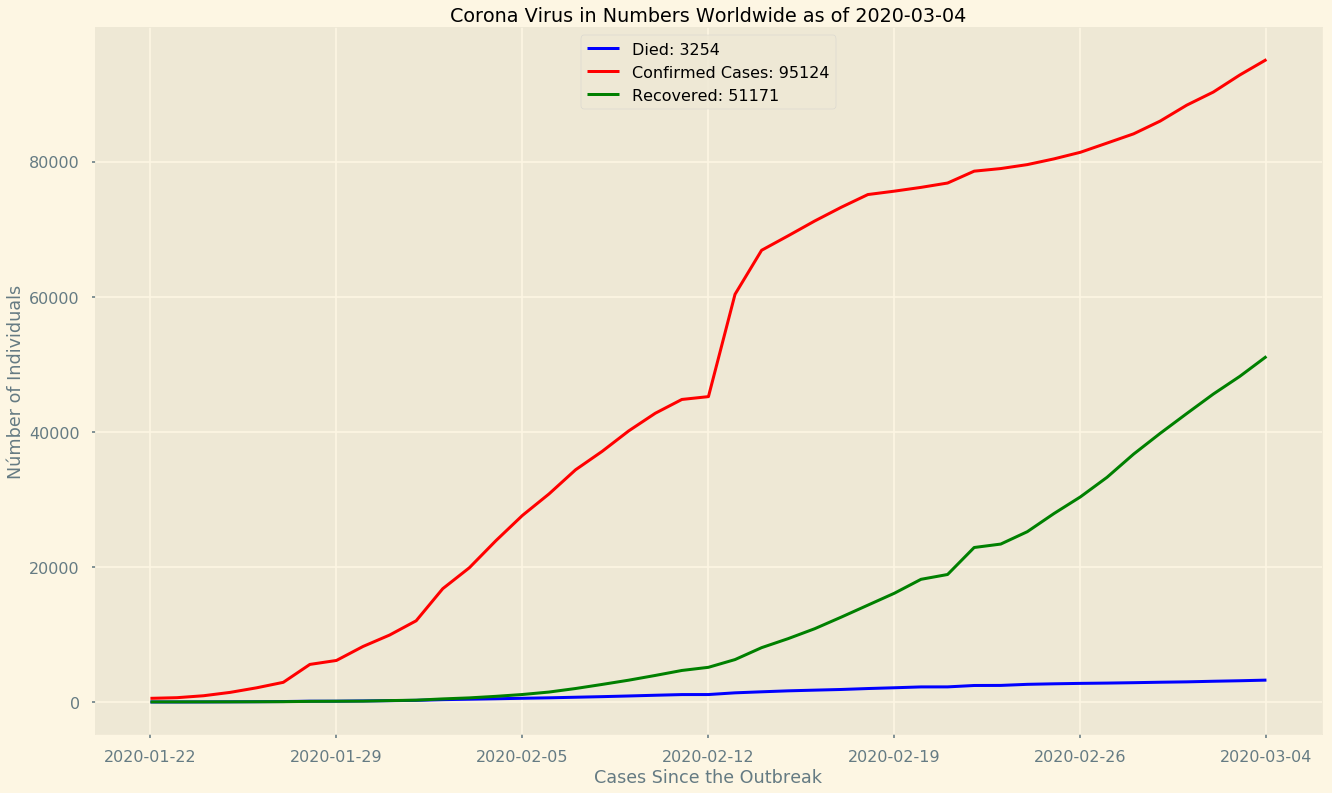

In [14]:
x = data.Date.unique()
fig, axes = plt.subplots(figsize=(22,13))
plt.style.use('seaborn-pastel')
y_dead = list_dead
y_confirm_cases = list_confirm_cases
y_recovered = list_recovered
plt.plot(x, y_dead, color='blue', label='Died: %s' %list_dead[-1], linewidth=3.0)
plt.plot(x, y_confirm_cases, color='red', label='Confirmed Cases: %s' % list_confirm_cases[-1], linewidth=3.0)
plt.plot(x, y_recovered, color='green', label='Recovered: %s' % list_recovered[-1], linewidth=3.0)
plt.xlabel('Cases Since the Outbreak')
plt.ylabel('Númber of Individuals')
plt.title('Corona Virus in Numbers Worldwide as of %s' % b)
plt.grid(True)
plt.legend(loc='upper center')
plt.savefig('corona.png')
plt.show()

Finding the Mortality Rate

In [9]:
mortality_rate = {'Deaths': list_dead[-1],
                'Confirmed Cases': list_confirm_cases[-1],
                'Recovered': list_recovered[-1]}
mortality_rate = pd.DataFrame([mortality_rate])
mortality_rate['Mortality(%)'] = round((mortality_rate['Deaths']/mortality_rate['Confirmed Cases'])*100,3)
mortality_rate

,Deaths,Confirmed Cases,Recovered,Mortality(%)
0,3254,95124,51171,3.421


In [10]:
import folium
from folium.plugins import HeatMap
map = folium.Map(location=[10,10],zoom_start=1.5,tiles='Stamen Toner')
location = []

for x,i in zip(list[len(list)-1]['Latitude'], list[len(list)-1]['Longitude']):
    temp = [x,i]
    location.append(temp)
HeatMap(location, radius=20).add_to(map)
map.save('corona_map.html')